## Assignment Overview

You will use python to solve the following problem:  *analyze the Trump/Biden 2020 Presidential Debate, splitting transcribed text into separate speakers, and analyzing the separated Trump corpus and separated Biden corpus.*

The purpose of this assignment is to:
- practice using programming techniques to solve a more complex problem
- use the Natural Language Processing techniques learned in Chapter 12
- explore an example data set from Kaggle

**New Programming Skills:** splitting a large text file with lines labeled by speaker names into 3 separate lists, then processing them individually

**Reinforced Skills:** problem solving using python, using Pandas, TextBlob, Textatistic, generating bar charts and word clouds.



## Project Requirements

Create a program that performs text-based data analysis on the 2020 Presidential Debate data set, available from Kaggle here: https://www.kaggle.com/datasets/gpreda/usa-presidential-debate-2020.  Since the Kaggle site requires a login prior to the download, we will not use the requests package to fetch it directly, instead we will open a local copy of the file, which is provided.  We'll report the top 30 most frequently used words by Trump and Biden, generate a bar chart and (optional) word cloud those words, and also report the Felsch-Kincaid score, the Simple Measure of Gobbledygook (SMOG) score, and the Gunning Fox score, to determine the "reading level" of the debate from each participant.

As an extension, you may want to search Kaggle for some transcripts of the current debates, and run them through your program as well!

## Instructions

First, open and explore the debate transcript file.  Notice that most lines begin with a name, such as "WALLACE", "TRUMP", or "BIDEN".  Some lines do not begin with a name, and are a continuation of the line above (we will just ignore these un-labeled lines, in order to keep this project relatively small).  There is also a blank line between each paragraph.  

**Challenge (not required):**  see if you can solve this problem without looking at the detailed instructions below (just look at the output and try to reproduce it).

## Sample Output

```
Enter filename to analyze:  presidential_debate_transcript.txt
   TRUMP words  TRUMP count
0       people           46
1        would           36
2         want           33
3         know           30
4          joe           24
5         well           24
6         said           24
7         look           24
8        going           23
9        think           22
10          go           18
11        good           17
12     million           17
13         got           17
14        done           17
15        like           16
16         say           15
17    military           15
18        left           15
19          ph           14
20        tell           14
21         see           14
22     dollars           14
23          oh           14
24        much           13
25     country           13
26         one           13
27       never           13
28       right           12
29      really           12

   BIDEN words  BIDEN count
0       people           46
1        would           36
2         want           33
3         know           30
4          joe           24
5         well           24
6         said           24
7         look           24
8        going           23
9        think           22
10          go           18
11        good           17
12     million           17
13         got           17
14        done           17
15        like           16
16         say           15
17    military           15
18        left           15
19          ph           14
20        tell           14
21         see           14
22     dollars           14
23          oh           14
24        much           13
25     country           13
26         one           13
27       never           13
28       right           12
29      really           12

For TRUMP:
Readability Flesch-Kincaid score: 1.65 
Readability Simple Measure of Gobbledygook score: 6.13 
Readability Gunning Fog score: 4.48 

For BIDEN:
Readability Flesch-Kincaid score: 2.05 
Readability Simple Measure of Gobbledygook score: 6.64 
Readability Gunning Fog score: 5.09 
```

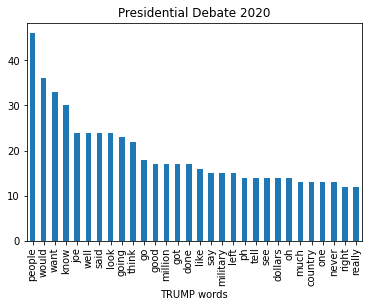

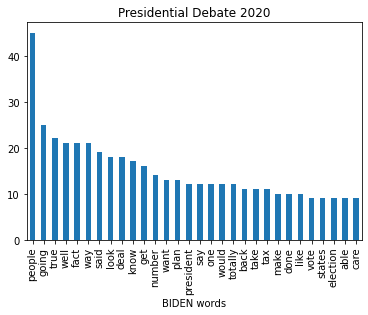

The word clouds were written to a file, but should look similar to these:

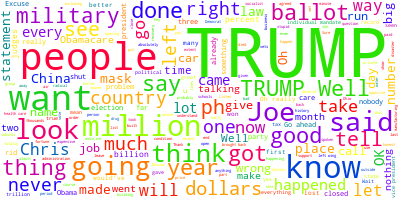

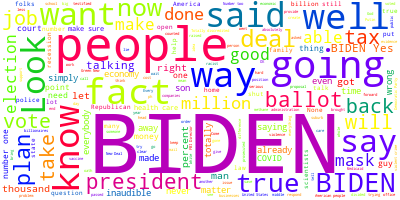

## Let's start coding!

In [1]:
# Install necessary dependencies
from pathlib import Path   # use this new way to open file
from textblob import TextBlob
from nltk.tokenize import BlanklineTokenizer  # to split into paragraphs
from nltk.corpus import stopwords  # stop words to remove
from operator import itemgetter
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textatistic import Textatistic

### First Step: Write a function to open the file

When approaching this program, let's BEGIN with opening the file.  I recommend that you use the Path() function from the Path module.  Then, you can use a special tool to split the text into separate paragraphs.  We can use a function called `BlanklineTokenizer()` in order to do this.  

You will needed to load the BlankLineTokenizer module:<br>
`from nltk.tokenize import BlanklineTokenizer  # to split into paragraphs`

Then, will need these 3 lines of code that leverage TextBlob and the tokenizer. Assuming that you have used Path() to read the file into a string named `raw_text`, it will look like this:
```
tokenizer = BlanklineTokenizer()
blob = TextBlob(raw_text)
para_list = blob.tokenize(tokenizer)
```

#### Write a function to open the file here, and be sure to manually test it:

In [2]:
# You can name this function anything you want.  
# You probably want to pass it the name of a file,
# and return a list of strings containing the paragraphs.
def read_text_file(filename):
    '''Reads text from a file and breaks into paragraphs '''
    
    raw_text = ""
    
    try:
        file = Path(filename)
        raw_text = file.read_text()
    except:
        print(filename, 'not found!')
   
    # split text into paragraphs
    tokenizer = BlanklineTokenizer()
    blob = TextBlob(raw_text)
    para_list = blob.tokenize(tokenizer)
    
    return para_list


#### Manually test your code here.  Are you getting a list of strings from the file?

In [ ]:
#paragraphs = read_text_file(filename="presidential_debate_transcript.txt")
#print(paragraphs)

### Second Step:  Data Munging: Split the paragraph list into separate lists for each person speaking

Write a function that divides the paragraphs into different people.
1. You will need to process this paragraph list, probably using a for loop, and checking to see if the first word on each line matches one of the 3 speakers ('WALLACE:', 'TRUMP:', or 'BIDEN:').
2. If the first word on the line matches 'TRUMP:', add that line to a list of trump paragraphs.
3. If the first word on the line, matches 'BIDEN:', add that line to a list of biden paragraphs.
4. Otherwise (for WALLACE: paragraphs, and also for paragraphs that are not labeled directly), just ignore that paragraph (and don't store it).
5. You should probably print these lists, and verify that they are accurate.

We will grade this function using the autograder, so let's name it `split_into_candidates`.  This function should take a list of paragraphs as the argument, and return a two-tuple, containing the paragraphs that belong to Trump (first) and then the paragraphs that belong to Biden (second).



#### Write the `split_into_candidates` function to open the file here, and be sure to manually test it:

In [3]:
def split_into_candidates(list_of_paragraphs):
    ''' Looking at just the first word of each paragraph, split them into
        lists of paragraphs that BEGIN with TRUMP: and BIDEN:, then return
        a two tuple of lists of the paragraphs, with the Trump list first '''
    
    
    trump_list = []
    biden_list = []
    candidate_tuple = ()

    for line in list_of_paragraphs:
    
        if line.startswith('TRUMP: '):
            
            trump_list.append(line)
            
        elif line.startswith('BIDEN: '):
        
            biden_list.append(line)

    #add elements to the tuple
    candidate_tuple = (trump_list, biden_list)  
    
    return candidate_tuple
    

When writing a function like this, it's best to deal with a shorter data set, so you may want to test it with a smaller file.  We've included a test file named `debate_test.txt` that may be useful.

#### Manually test your code here.  Are you getting the right results?  (Look at the test file, and see if your program is counting the number of lines correctly.). You should get these results:

```
Processed in debate_test.txt: 2 lines by TRUMP, 4 lines by BIDEN
```

In [ ]:
# when testing, use your first function to open the file and get a list of paragraphs

# call the read_text_file function
#paragraphs = read_text_file(filename='presidential_debate_transcript.txt')


# then, use the split_into_candidates() function, and summarize the number of lines you detect
# call the splint_into candidates.
#candidates = split_into_candidates(paragraphs)

#print(candidates[0], '\n\n')
#print(candidates[1])

#### Now, test your code with some automated tests:

In [4]:
### BEGIN TESTS
def test_split_into_candidates():
    # Test with sample input
    input_data = ["TRUMP: Hello America.", "BIDEN: Good evening.", "TRUMP: Make America great again."]
    output_data = split_into_candidates(input_data)
    assert output_data == (["TRUMP: Hello America.", "TRUMP: Make America great again."], ["BIDEN: Good evening."]), \
    "Your function should correctly separate paragraphs that start with 'TRUMP:' and 'BIDEN:'."
    
    # Test with only Trump paragraphs
    input_data = ["TRUMP: Hello America.", "TRUMP: Make America great again."]
    output_data = split_into_candidates(input_data)
    assert output_data == (["TRUMP: Hello America.", "TRUMP: Make America great again."], []), \
    "When only 'TRUMP:' paragraphs are present, the second tuple element should be an empty list."
    
    # Test with only Biden paragraphs
    input_data = ["BIDEN: Good evening.", "BIDEN: United we stand."]
    output_data = split_into_candidates(input_data)
    assert output_data == ([], ["BIDEN: Good evening.", "BIDEN: United we stand."]), \
    "When only 'BIDEN:' paragraphs are present, the first tuple element should be an empty list."
    
    # Test with no paragraphs
    input_data = []
    output_data = split_into_candidates(input_data)
    assert output_data == ([], []), \
    "When there are no paragraphs, both tuple elements should be empty lists."
    
    # Test with paragraphs that do not start with either 'TRUMP:' or 'BIDEN:'
    input_data = ["MODERATOR: Welcome.", "AUDIENCE: Applause."]
    output_data = split_into_candidates(input_data)
    assert output_data == ([], []), \
    "When paragraphs do not start with 'TRUMP:' or 'BIDEN:', both tuple elements should be empty lists."
    
test_split_into_candidates()
### END TESTS

### Third Step: More Data Munging: remove stop words and speaker names and the odd word "n't"

We want to remove stopwords, and also remove the name of the candidate (since Trump did not say "TRUMP" at the start of each paragraph!).  There is also a weird word "n't" included in the data in places, so let's remove it as well. Finally, let’s generate a list of tuples with word counts for each word found

Since we want to do the same thing for both datasets, it makes sense to write one function. Let's write a function named `clean_corpus()`, that takes 2 arguments: the list of separate paragraphs, and the name of the candidate. It will then return a **list of tuples, where each 2-tuple contains a word and the number of times it was repeated (for that particular candidate that was requested in the function call).** For example, if a candidate only said the phrase “python rules” and repeated it 5 times, this function would return ```[ (‘python’, 5), (‘rules’, 5) ]```

The function will perform these tasks:
1. In order to get TextBlob to process the text, you will need to take the list of paragraphs for the candidate, and use .join() to combine them back into a single string.
2. Then, create a TextBlob for the text from the candidate.  
3. You can use a built-in function from TextBlob to generate the requested list of words and their counts (Hint: try candidate_blob.word_counts.items() and see what it gives you!)
4. Remove the stop words from the selection
5. Also remove the name of the candidate (i.e. Trump did not say "trump" each time), and there is a weird word "n't" also included in the data, so remove that.


**Write the `clean_corpus()` function here:**

In [9]:
def clean_corpus(text, candidate_name):
    ''' process the text (a list of paragraphs), removing (1) stop words, 
        (2) the candidates name, and (3) the word "n't".  
        Return the final list of words.'''
  
    import nltk
    #nltk.download('stopwords')
    #nltk.download('punkt')
    stops = stopwords.words('english')
    
    word_count_list = []
    word_list = []     # new
    
    # join the paragraphs back together
    line_str = " ".join(text)
    
    line_str = line_str.replace(candidate_name, " ")
    line_str = line_str.replace(candidate_name.upper() +':', '' )
    line_str = line_str.replace("n't", " ")
    
    
    # convert to lowercase()
    line_str = line_str.lower()
    
    # create the textblob for the candidate.
    candidate_blob = TextBlob(line_str)
    

    # create a list without the stop word
    no_stopwords_list = [word for word in candidate_blob.words if word not in stops]
    
    for word in no_stopwords_list:
       
        if word not in word_list: 
       
            #if word not in word_count_list: # get the count
            count = candidate_blob.word_counts[word]
            results_tup = (word, count)
            word_count_list.append(results_tup)
            word_list.append(word)
    
    return word_count_list

Manually test your code here. Are you getting the right results? (Look at the test file, and see if your program is counting the number of lines correctly.). You should get these results:

```Processed in debate_test.txt: 3 cleaned words by TRUMP, 5 cleaned words by BIDEN```

In [ ]:
# when testing, use your first function to open the file and get a list of paragraphs
# and split into two lists by candidates
# YOUR CODE HERE
raise NotImplementedError()

# then, use the clean_corpus() function, number of words afterwards
# YOUR CODE HERE
raise NotImplementedError()

#### Now, test your code with some automated tests:

In [10]:
### BEGIN TESTS
def test_clean_corpus():
    # Test 1: sample text and candidate name
    sample_text = ["Trump loves America.", "He doesn't like fake news."]
    candidate_name = "Trump"
    cleaned_text = clean_corpus(sample_text, candidate_name)
    assert cleaned_text == [('loves', 1), ('america', 1), ('like', 1), ('fake', 1), ('news', 1)], \
    "Your function should remove stop words, the candidate's name, and the word 'n't'. Ensure the word frequency is correct."
    
    # Test 2: with no text
    sample_text = []
    candidate_name = "Biden"
    cleaned_text = clean_corpus(sample_text, candidate_name)
    assert cleaned_text == [], "An empty list should return an empty list."
    
    # Test 3: with all stop words and the word 'n't'
    sample_text = ["He isn't the."]
    candidate_name = "Trump"
    cleaned_text = clean_corpus(sample_text, candidate_name)
    assert cleaned_text == [], "Your function should filter out all stop words and the word 'n't'."

test_clean_corpus()
### END TESTS

### Fourth Step: Generate a bar chart for the top 30 words

Create a function that will plot a bar chart for the top 30 words for a particular candidate.  You can name this function anything you want, because we will be manually grading it.

Requirements:
1. One function is used to create a bar chart (for either candidate, one at a time).
2. You will need to pass this function arguments to tell it what title should be used (TRUMP or BIDEN).
3. Your function should display the bar chart, so that is is similar to the following example which is shown in the manual testing section for this function.

In [11]:
def generate_bar_chart(cand_name, cleaned_corpus_txt):

    ''' Generate the bar chart of top thirty '''
    
    cleaned_corpus_txt.sort(key=lambda val: val[1], reverse=True)
    
    top_30_words = cleaned_corpus_txt[:30]
    
    name = cand_name.upper()
    
    word_col = name + " " + 'words'
    count_col = name +" " + 'counts'
    title_chart='Presidential Debate 2020'
    
    # create a dataframe for the data.
    candidate_df = pd.DataFrame(top_30_words, columns=[word_col, count_col])
    
    # create the bar plot/ chart
    axes = candidate_df.plot.bar(x=word_col, y=count_col, legend=False
                                 , title=title_chart)
    
    plt.gcf().tight_layout()
    
    
    print(axes)  

Manually test your code here. Are you getting the right results? (Look at the test file, and see if your program is counting the number of lines correctly.). You should something close to these results:
```
   TRUMP words  TRUMP count
0       people           46
1        would           36
2         want           33
3         know           30
4          joe           24
5         well           24
6         said           24
7         look           24
8        going           23
9        think           22
10          go           18
11        good           17
12     million           17
13         got           17
14        done           17
15        like           16
16         say           15
17    military           15
18        left           15
19          ph           14
20        tell           14
21         see           14
22     dollars           14
23          oh           14
24        much           13
25     country           13
26         one           13
27       never           13
28       right           12
29      really           12
```
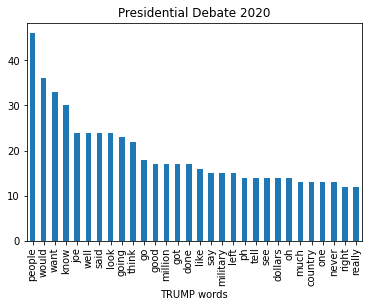

In [ ]:
# use your earlier functions as needed, then call your new function to test it
# print the bar chart.
#cand_name = 'Trump'
#cand_name2 = 'Biden'
    
#generate_bar_chart(cand_name, cleaned_corpus_trump)
#generate_bar_chart(cand_name2, cleaned_corpus_biden)

### Fifth Step:  determine the "reading level" of the debate text of each participant.

Now we will write a specific function (so that you can receive autograded feedback) to use 
Textatistic to report three different readability scores:  
the Felsch-Kincaid score, the Simple Measure of Gobbledygook (SMOG) score, and 
the Gunning Fox score, to determine the "reading level" of the debate from each participant.

Write a function named `readability` which will accept a corpus of text (see important note below) and return a three-tuple which contains the three scores above, in order.

1. The function will accept one argument, which is the list of paragraphs for a given candidate (this is before you have processed it to remove the stop words) -- in other words, **this is the text that was returned by the split_into_candidates() function for one of the candidates**.
2.  The function will return a three-tuple, in the following order: (Felsch-Kincaid score, SMOG score, Gunning Fox Score).

In [12]:
def readability(text_list):
    ''' report the 3 readability scores for the given text_string '''
     # Felsch-Kincaid score, the Simple Measure of Gobbledygook (SMOG) score, 
    # and the Gunning Fox score
    
    combined_list = " ". join(text_list)   
    
    # create the textatistic model
    scores = Textatistic(combined_list)
    flesch_score = scores.fleschkincaid_score
    smog_score = scores.smog_score
    gf_score = scores.gunningfog_score
   
    score_tup = (flesch_score, smog_score, gf_score)
   
    return score_tup
   

Manually test your code here. Are you getting the right results? (Look at the test file, and see if your program is counting the number of lines correctly.). You should get these results:

```
Processed in debate_test.txt:
TRUMP: (1.700000000000001, 3.1291, 2.0)
BIDEN: (3.469999999999999, 3.1291, 2.0)
```

```
Processed in presidential_debate_transcript.txt:
TRUMP: (1.649326183040838, 6.134201812602958, 4.480545949775015)
BIDEN: (2.0520991902685424, 6.643366147891929, 5.0901679660544135)
```

In [ ]:
# use your earlier functions as needed, then call your new function to test it
# YOUR CODE HERE
#raise NotImplementedError()

#### Now, test your code with some automated tests:

In [13]:
### BEGIN TESTS
def test_readability():
    # Test 1: with sample text
    sample_text = ["This is a sample text.", "It should provide some basic readability metrics."]
    readability_scores = readability(sample_text)
    assert type(readability_scores) == tuple and len(readability_scores) == 3, "Your function should return a tuple with three elements for the readability scores."
    
    # Test 2: with a text containing complex words
    sample_text = ["Pernicious occurrences often entail a plethora of intricate details."]
    readability_scores = readability(sample_text)
    assert all(score > 0 for score in readability_scores), "For complex text, each readability score should be greater than zero."
    
    # Test 3: with a single sentence
    sample_text = ["This is a single sentence."]
    readability_scores = readability(sample_text)
    assert type(readability_scores) == tuple and len(readability_scores) == 3, "Even with a single sentence, your function should return a tuple with three elements for the readability scores."

    
test_readability()
### END TESTS

### For fun: Generate a wordcloud for the top 30 words (not required!)

Create a function that will create a wordcloud for the top 30 words for a particular candidate.  You can name this function anything you want, because this is just for fun and not graded.

Suggestions:
1. One function is used to create a wordcloud (for either candidate, one at a time).
2. You will need to pass this function arguments to tell it what title should be used (TRUMP or BIDEN).
3. Your function should display the wordcloud, so that is is similar to the following example.

It should look something like this.

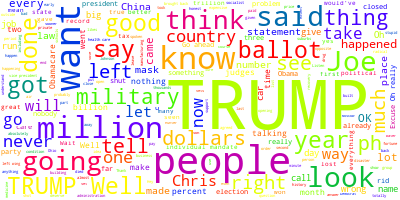

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

# go ahead and test your code here
# YOUR CODE HERE
raise NotImplementedError()

### Sixth Step: Pulling it all together in main() (this part is required!)

Now, join all these functions into a useful program, which could be used to analyze any file that contains a debate betwen Biden and Trump.  Your main() function should include all the following requirements:

1. Prompt the user to enter a filename.
2. Open the file and tokenize it (Step 1)
3. Split the paragraph list into separate lists for each person speaking (Step 2)
4. For each candidate, remove stop words, speaker names, and the odd word "n't" (Step 3)
5. Generate a bar chart of the top 30 words for each participant. (Step 4)
6. Report the required items of the "reading level" for each participant (Step 5)

Your output does not need to match the sample output exactly (as shown at the top of this notebook), but it should be similar.  (In particular, the readability scores may differ slightly.)

#### Write your main() function so that it meets the requirements above:

In [14]:
def candidate_readability(candidate, name):
    ''' Displays the readiblity scores for a given candidate '''
    
    print("\nFor", name.upper(), ": ")
    
    print(f"Readability Flesch-Kincaid score: {readability(candidate)[0]:.2f}")
    print(f"Readability Simple Measure of Gobbledygook score: {readability(candidate)[1]:.2f} ")
    print(f"Readability Gunning Fog score: {readability(candidate)[2]:.2f} ")
    
def main():
    ''' Main Driver of the Program '''
    
    # get the file name from the user.
    file_name = input("Please file name: ")
    
    # call the read_text_file function
    paragraphs = read_text_file(filename=file_name)
    
    # call the splint_into candidates.
    candidates = split_into_candidates(paragraphs)
    
    # clean the corpus for each candidate
    cleaned_corpus_trump = clean_corpus(candidates[0], "Trump")
    cleaned_corpus_biden = clean_corpus(candidates[1], "Biden")
    
    # create the bar charts
    cand_name = 'Trump'
    cand_name2 = 'Biden'
    generate_bar_chart(cand_name, cleaned_corpus_trump)
    generate_bar_chart(cand_name2, cleaned_corpus_biden) 
    
    # Readability statistics for the candidates
    candidate_readability(candidates[0], "TRUMP") 
    candidate_readability(candidates[1], "BIDEN")     

#### Execute this cell to call your main function, and test it thoroughly.

Please file name:  presidential_debate_transcript.txt


Axes(0.0663628,0.203183;0.9102x0.723206)
Axes(0.0663628,0.228704;0.9102x0.697685)

For TRUMP : 
Readability Flesch-Kincaid score: 1.65
Readability Simple Measure of Gobbledygook score: 6.13 
Readability Gunning Fog score: 4.48 

For BIDEN : 
Readability Flesch-Kincaid score: 2.05
Readability Simple Measure of Gobbledygook score: 6.64 
Readability Gunning Fog score: 5.09 


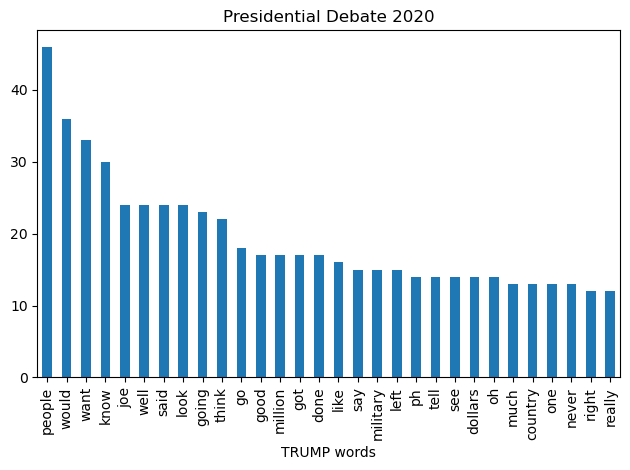

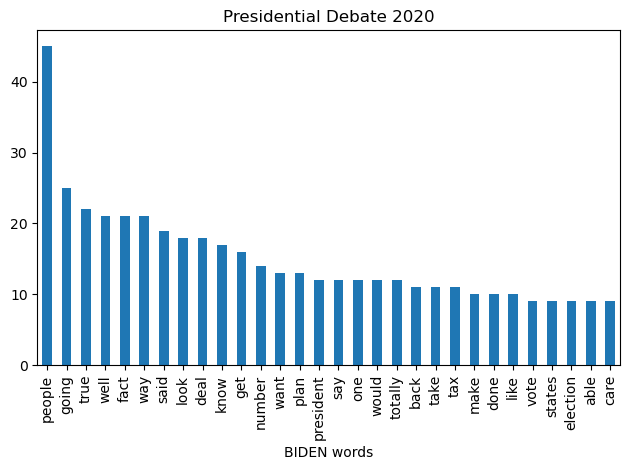

In [15]:
# Execute this cell to call your main function, and test it thoroughly.
main()

#### An important note on autotesting the program associated with the main() function:

The decisions we make while solving problems with programming are similar to many of the decisions we make in life, often with no one correct answer, but instead require analysis of the tradeoffs among the possible answers and careful consideration of the context or environment they exist in.  Testing code is no stranger to this, and with that said, autotesting the function associated with our main program comes down to the tradeoff between the complexity of trying to automate the multiple side effects associated with a number of functions that it coordinates the execution for versus the easy and non-complex manual testing that could be done given the relatively simple nature of the main program's code itself.  Therefore, the course facilitators will manually grade your main() function, and ensure that it meets the requirements.  The rubric (grading guide) used by the course facilitators is shown here.  Please check that you have met all the requirements below – then follow the instructions [here](https://www.coursera.org/learn/ball-state-univeristy-introduction-to-programming/assignment-submission/QgjpS/submit-project-3) to submit your final version of the project.